# Import the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Load the datasets

In [2]:
train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")

In [3]:
train_data.head(), test_data.head()

(      x          y
 0  24.0  21.549452
 1  50.0  47.464463
 2  15.0  17.218656
 3  38.0  36.586398
 4  87.0  87.288984,
     x          y
 0  77  79.775152
 1  21  23.177279
 2  22  25.609262
 3  20  17.857388
 4  36  41.849864)

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train_data, title='Data Report')
profile.to_file('Data_Report.html')

# Cleaning the dataset

In [5]:
x = train_data["x"]
y = train_data["y"]

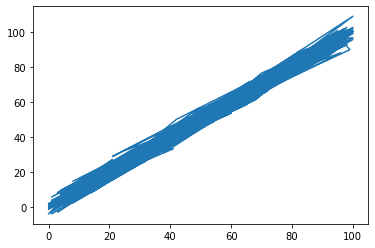

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y)

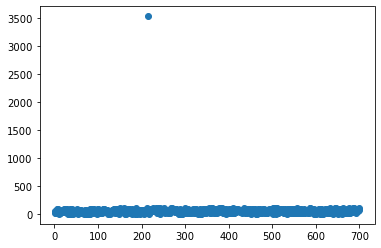

In [7]:
plt.scatter(np.arange(1, len(x) + 1), x)

### Drop the unwanted data

In [8]:
train_data = train_data.drop(x[x > 500].index)
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


# Create and Train the model

In [9]:
x = train_data["x"]
y = train_data["y"]

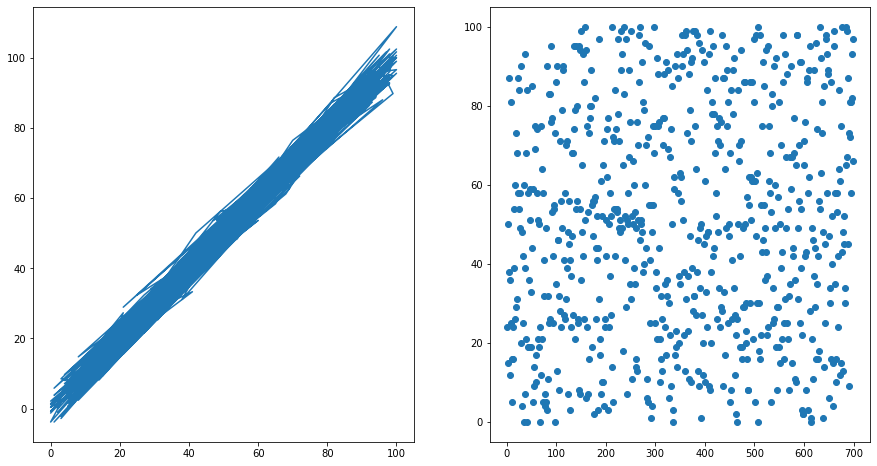

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(x, y)
ax[1].scatter(np.arange(1, len(x) + 1), x)

### Split the data into train and test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

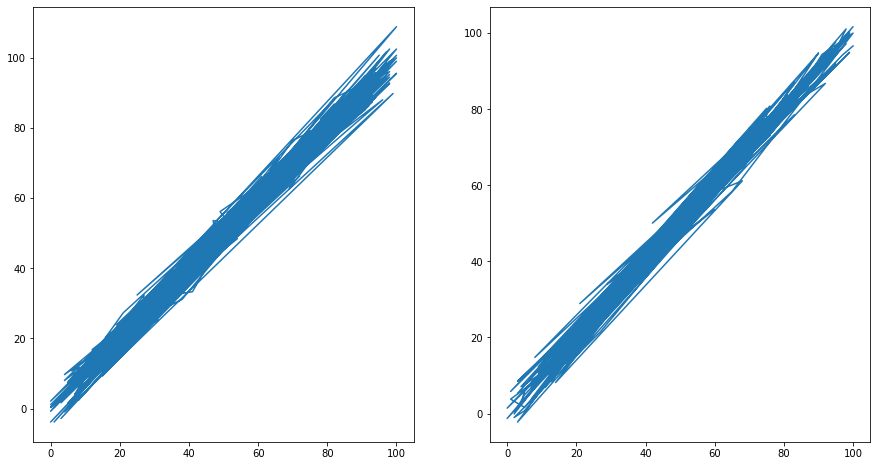

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(X_train, y_train)
ax[1].plot(X_test, y_test)

<AxesSubplot:>

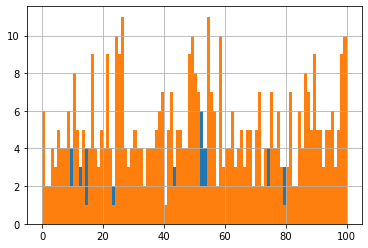

In [13]:
X_test.hist(bins=100)
X_train.hist(bins=100)

### Train the model

In [14]:
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1), y_train)

LinearRegression()

### Predict

In [15]:
pred = lr.predict(np.array(X_test).reshape(-1, 1))

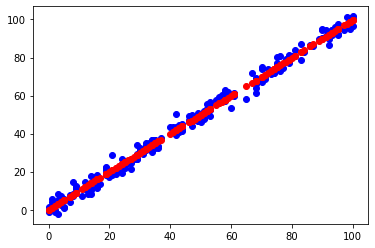

In [16]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, c="b")
ax.scatter(X_test, pred, c="r")

### Mean Squared Error

In [17]:
mean_squared_error(y_test, pred)

7.81234385927861

In [18]:
lr.score(np.array(X_test).reshape(-1, 1), np.array(X_test).reshape(-1, 1))

0.9999803292521611

In [19]:
lr.score(np.array(X_test).reshape(-1, 1), pred)

1.0

# Test the model with the Test data

In [20]:
x = test_data["x"]
y = test_data["y"]

### Predict

In [21]:
pred = lr.predict(np.array(x).reshape(-1, 1))

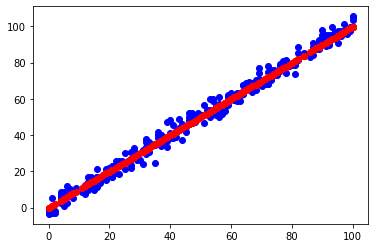

In [22]:
fig, ax = plt.subplots()
ax.scatter(x, y, c="b")
ax.scatter(x, pred, c="r")

### Mean Squared Error

In [23]:
mean_squared_error(y, pred)

9.504514515155742

In [24]:
lr.score(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

0.9887164516179864

In [25]:
lr.score(np.array(x).reshape(-1, 1), pred)

1.0